In [1]:
import os
import sys
import h5py
import numpy as np
import matplotlib as mpl
path = '/tigress/ruix/vis/'
os.chdir(path)
import matplotlib.pyplot as plt
#plt.style.use('apw-notebook.mplstyle')
%matplotlib inline
%run LoadNotebook
import DataProcess as R
#import matplotlib.cm as cmaps
#from  matplotlib.colors import LogNorm
from ipywidgets import widgets,interact,fixed
from IPython.display import display

importing Jupyter notebook from DataProcess.ipynb


In [2]:
import os
path = '/tigress/ruix/simu/1dang70mass100new/output/'
os.chdir(path)

/usr/licensed/anaconda/4.1.1/lib/python2.7/site-packages/ipykernel/__main__.py:21: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/licensed/anaconda/4.1.1/lib/python2.7/site-packages/ipykernel/__main__.py:23: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


"\nfor ind in range(0,num):\n    Tmpe[ind] = R.prtl_tmp_general_rel(ind*8+10,'e',xL, xR,shock=1,frame='rest')\n    Tmpi[ind] = R.prtl_tmp_general_rel(ind*8+10,'i',xL, xR,shock=1,frame='rest')\n    time[ind] = R.readparam('time',ind*8+10)\nfig,ax = plt.subplots(3,sharex= True)\nax[0].semilogx(time,Tmpi)\nax[1].semilogx(time,Tmpe)\nax[2].semilogx(time,Tmpe/Tmpi)\n\nax[2].set_xlabel('Time$[\\omega_{pe}^{-1}]$')\nax[0].set_ylabel(r'$\rm T_i/m_e c^2$')\nax[1].set_ylabel(r'$\rm T_e/m_e c^2$')\nax[2].set_ylabel(r'$\rm T_e/T_i$')\n\n"

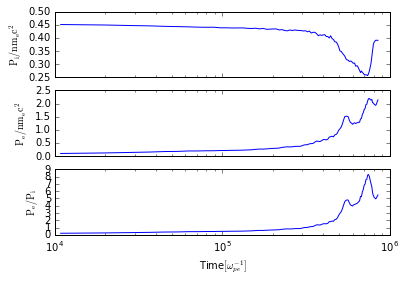

In [18]:
import os
path = '/tigress/ruix/simu/1dang70mass100new/output/'
#path = '/tigress/ruix/new_simu/1dang70mass100/output/'
os.chdir(path)
xL = 500
xR = 1500
num = 98
Tmpe = np.zeros(num)
Tmpi = np.zeros(num)
time = np.zeros(num)

for ind in range(0,num):
    Tmpe[ind] = R.prtl_tmp_general_rel(ind*8+10,'e',xL, xR,shock=1,frame='')
    Tmpi[ind] = R.prtl_tmp_general_rel(ind*8+10,'i',xL, xR,shock=1,frame='')
    time[ind] = R.readparam('time',ind*8+10)
    # ishf=index, xshf=position
    ishf,xshf,sh_speed = R.shfind(ind*8+10)
    xL1 = (xL + xshf)*R.readparam('c_omp')/R.readparam('istep')
    xR1 = (xR + xshf)*R.readparam('c_omp')/R.readparam('istep')
    dens = R.readflds('dens',ind*8+10)
    dense = np.mean(dens[dens.shape[0]/2,xL1:xR1])/R.readparam('ppc0')
    dens = R.readflds('densi',ind*8+10)
    densi = np.mean(dens[dens.shape[0]/2,xL1:xR1])/R.readparam('ppc0')
    #print densi,xshf,dens.shape[1]
                    
fig,ax = plt.subplots(3,sharex= True)
ax[0].semilogx(time,Tmpi*densi)
ax[1].semilogx(time,Tmpe*dense)
ax[2].semilogx(time,Tmpe*dense/Tmpi/densi)

ax[2].set_xlabel('Time$[\omega_{pe}^{-1}]$')
ax[0].set_ylabel(r'$\rm P_i/n m_e c^2$')
ax[1].set_ylabel(r'$\rm P_e/n m_e c^2$')
ax[2].set_ylabel(r'$\rm P_e/P_i$')
#ax[0].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
#fig.savefig('/tigress/ruix/vis/sample1.pdf')

'''
for ind in range(0,num):
    Tmpe[ind] = R.prtl_tmp_general_rel(ind*8+10,'e',xL, xR,shock=1,frame='rest')
    Tmpi[ind] = R.prtl_tmp_general_rel(ind*8+10,'i',xL, xR,shock=1,frame='rest')
    time[ind] = R.readparam('time',ind*8+10)
fig,ax = plt.subplots(3,sharex= True)
ax[0].semilogx(time,Tmpi)
ax[1].semilogx(time,Tmpe)
ax[2].semilogx(time,Tmpe/Tmpi)

ax[2].set_xlabel('Time$[\omega_{pe}^{-1}]$')
ax[0].set_ylabel(r'$\rm T_i/m_e c^2$')
ax[1].set_ylabel(r'$\rm T_e/m_e c^2$')
ax[2].set_ylabel(r'$\rm T_e/T_i$')

'''


In [4]:
'''
compare magnetosonic velocity including CRs pressure with downstream velocity
'''
# Find shock velocity 
ish,xsh,sh_speed = R.shfind(10)
print ('sh_speed/c:',sh_speed)
ind = 700
num = 20
Presi = np.linspace(0,0,num)
Prese = np.linspace(0,0,num)
xaxis = np.linspace(0,(num+1)*200,num)
for i in range(num):
    xL = i*200
    xR = (i+1)*200
    Presi[i] = R.prtl_tmp_general_rel(ind,'e',xL,xR,shock=1,frame='rest')
    Prese[i] = R.prtl_tmp_general_rel(ind,'i',xL,xR,shock=1,frame='rest')
plt.plot(xaxis,Presi,'k') 
plt.plot(xaxis,Prese,'e')


('sh_speed/c:', 0.081925925925925916)


AttributeError: 'module' object has no attribute 'prtl_tmp_geneal_rel'

In [ ]:
from numpy.random import choices
population = gamma
weights = fgamma
choices(population, weights)
# 
fig, ax = plt.subplots(1, 1)
from scipy.stats import maxwell
r = maxwell.rvs(size=1000)
ax.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)

In [ ]:

def distribution(vb):
    # random number seed
    random.seed(time.time())

    vmin = 0.
    vmax = 5*vb
    v = vmin +(vmax-vmin)*random.uniform(0,1)
    # accept/reject value
    f = np.exp (-(v - vb) * (v - vb) / 2.)
    x = random.uniform(0, 1)
    if (x > f):
        return distribution (vb)
    else:
        return v

In [ ]:
vb = 10
num = 100
v = np.linspace(0,1,num)
for i in range(num):
    v[i] = distribution(vb)
plt.hist(v, bins='auto')